# Decision Tree Classifier and Decision Tree Regressor

### Decision Tree Classifier

In [46]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np

In [47]:
pet = pd.read_csv("https://github.com/Pedro3141/Pawpularity/raw/main/train.csv")

In [48]:
pet.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [49]:
#change Pawpularity into categorical
category = pd.cut(pet.Pawpularity,bins=[0,10,20,30,40,50,60,70,80,90,100],labels=[0,1,2,3,4,5,6,7,8,9])
pet.insert(14,'Level',category)
pet.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,Level
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,6
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,4
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,2
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,1
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,7


In [50]:
#split dataset in features and target variable
feature_cols = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = pet[feature_cols] # Features
y = pet.Level # Target variable

In [51]:
print(X)
print(y)

      Subject Focus  Eyes  Face  Near  Action  Accessory  Group  Collage  \
0                 0     1     1     1       0          0      1        0   
1                 0     1     1     0       0          0      0        0   
2                 0     1     1     1       0          0      0        0   
3                 0     1     1     1       0          0      0        0   
4                 0     0     0     1       0          0      1        0   
...             ...   ...   ...   ...     ...        ...    ...      ...   
9907              0     0     0     1       0          0      0        0   
9908              0     1     1     1       0          0      0        0   
9909              0     1     1     1       0          0      0        0   
9910              0     1     1     1       0          0      0        0   
9911              0     1     1     1       0          0      0        0   

      Human  Occlusion  Info  Blur  
0         0          0     0     0  
1         0  

In [52]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [53]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2679892400806994


In [55]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2710154673839946


In [56]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- class: 2
|   |   |--- feature_11 >  0.50
|   |   |   |--- class: 2
|   |--- feature_6 >  0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 2
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 3
|--- feature_2 >  0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: 2
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: 3
|   |--- feature_6 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 2
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 2



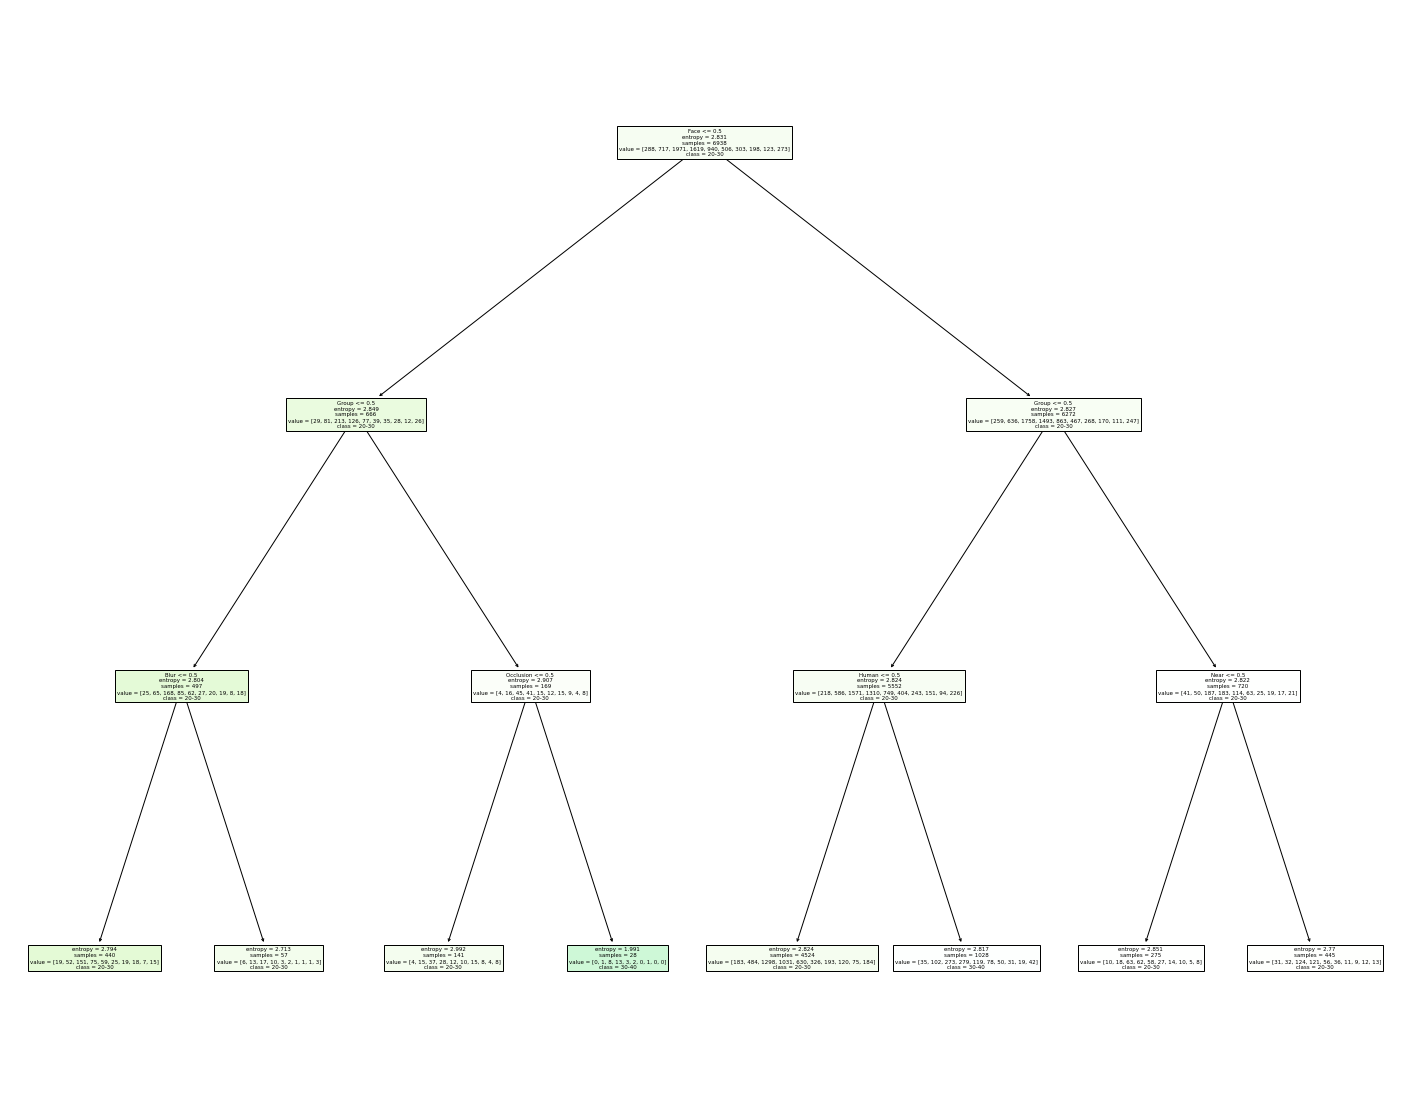

In [57]:
cn=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=cn,
                   filled=True)

In [58]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = clf.predict_proba(X_test)

# True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)
# print(fpr)
# print(tpr)

# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC: " + str(AUC))

AUC: 0.5500793997254224


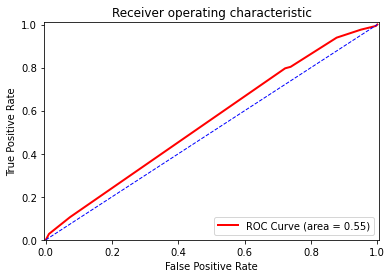

In [59]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
feature_cols = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = pet[feature_cols]
y = pet['Pawpularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)
y_1 = regr_1.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_1)
rmse = np.sqrt(mse)
print("RMSE: " + str(rmse))

RMSE: 20.618496862551037


Using Cross-Validation

In [61]:
from sklearn.model_selection import cross_val_score
#Using CV
feature_cols = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = pet[feature_cols]
y = pet['Pawpularity']
regr_1 = DecisionTreeRegressor(max_depth=4)

mse_list = cross_val_score(regr_1, pet[feature_cols], y, cv=10, scoring='neg_mean_squared_error')
rmse_list = np.sqrt(-mse_list)
rmse = rmse_list.mean()
print("RMSE: " + str(rmse))

RMSE: 20.58421403173975
